In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.linear_model import LinearRegression

### Используем сгенерированные данные нормального и показательного распределений разной длины.

In [123]:
data_normal_128 = np.random.normal(5,1,128)
data_normal_32 = np.random.normal(5,1,32)

data_exp_128 = np.random.exponential(3, 128)
data_exp_32 = np.random.exponential(3, 32)

### Построим гистограммы, используя правило Стерджеса для поиска оптимального количества интервалов.

$$ m = 1+3.332⋅log_{10}(n),$$ 

<p style="text-align: center;">или</p>

$$ m = 1+log{_2}{n},$$
n − длина выборки


In [124]:
def plot_histogram(stat):
    plt.figure(figsize = (7,4))
    plt.bar(stat['int'],stat['wi'], width=1.0, edgecolor = 'white')
    plt.xticks(fontsize = 8)
    plt.xlabel('x')
    plt.ylabel('w')
    plt.show()
    
def get_stat(data):
    m_ster = int(1 + np.log2(len(data)))
    print('Количество интервалов = ', m_ster)
    len_iter=(data.max() - data.min())/m_ster #длина каждого частичного интервала
    minn = data.min() - 0.001
    
    intervals = []
    while minn < data.max() - len_iter/2:
        intervals.append([round(minn,2),round(minn+len_iter,2)])
        minn = minn + len_iter
    
    stat = pd.DataFrame(intervals)
    stat['ni'] = np.zeros(len(stat)).astype(int)
    
    for i in range(len(data)):
        for k in range(len(stat)):
            if stat.loc[k,0]<=data[i] and stat.loc[k,1]>=data[i]:
                stat.loc[k,'ni'] = stat.loc[k,'ni'] + 1
                
    stat['wi'] = stat['ni']/len(data)
    stat['int'] = stat[0].astype(str) +' '+ stat[1].astype(str)
    return stat

### Критерий согласия Пирсона

**Критерий согласия** – критерий проверки гипотезы о предполагаемом законе неизвестного распределения. Критерий согласия позволяет ответить на вопрос о том, является ли различие между выборочными и теоретическим распределениями столь  незначительными, что они могут быть приписаны лишь случайным факторам. 

$$ \chi^2 = \displaystyle\sum_{k=1}^m \frac{(n_i - n'_i)^2}{n'_i} $$

где $ n'_i $ − теоретическая частота, $ n_i $ − эмпирическая частота, m − количество интервалов n - объем выборки.

$$ n'_i = n \cdot P_i$$

$$ P_i = \int_{x_i}^{x_{i+1}} F(x_{i+1}) - F(x_i) = Ф(\frac{x_{i+1} - \overline{x_в}}{s}) - Ф(\frac{x_i - \overline{x_в}}{s})$$

где $ x_i $ и $x_{i+1} $ − левая и правая границы i интервала, $ \overline{x_в} $ − х выборочное среднее, s − несмещенная оценка стандартного отклонения.

При верности нулевой гипотезы данный критерий имеет распределение $\chi^2$ c $k = m - r - 1$ степенями свободы, где $m$ – число интервалов, $r$ – число параметров распределения.
Критическая область принимается правосторонней, граница:
$\chi^2_{кр} = \chi^2(0.95, k)$

Если $\chi^2 > \chi^2_{кр}$, но нулевая гипотеза отвергается, есть статистические значимые различия.










### Проверка гипотезы о нормальности распределения

In [125]:
def pirs_norm(stat, data):
    mean = data.mean()
    std = data.std()
    #получение теоретических частот нормального распределения
    stat['Pi'] = (scipy.stats.norm.cdf((stat[1]-mean)/std) - 0.5) - \
                        (scipy.stats.norm.cdf((stat[0]-mean)/std) - 0.5)
    stat['nP'] = stat['Pi'] * len(data)
    Xi2 = sum((stat['ni']-stat['nP'])**2/stat['nP']) #полученное значение критерия Пирсона
    
    #Критическое значение берем из таблицы
    k = len(stat) - 2 - 1 #число степеней свободы = кол-во интервалов - кол-во параметров распр - 1
    Xi2teor = scipy.stats.chi2.ppf(0.95, k)
    
    print(f'Полученное значение критерия Пирсона {round(Xi2,2)}, критическое значение {round(Xi2teor,2)}')
    if Xi2 < Xi2teor:
        print('Выборка принадлежит нормальному распределению')
    else:
        print('Выборка НЕ принадлежит нормальному распределению') 

Количество интервалов =  8


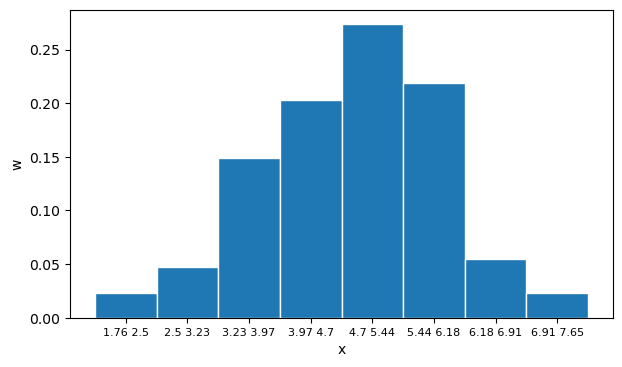

Полученное значение критерия Пирсона 3.95, критическое значение 11.07
Выборка принадлежит нормальному распределению

Количество интервалов =  6


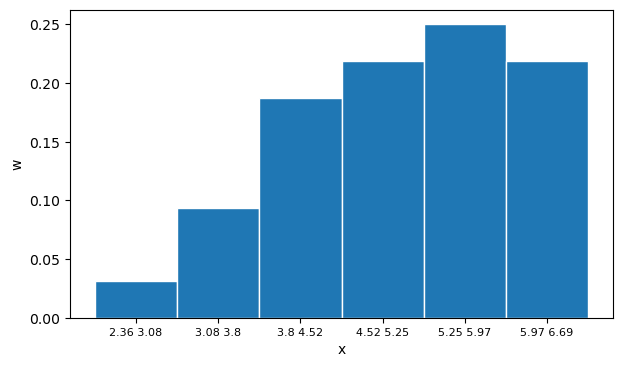

Полученное значение критерия Пирсона 3.13, критическое значение 7.81
Выборка принадлежит нормальному распределению

Количество интервалов =  8


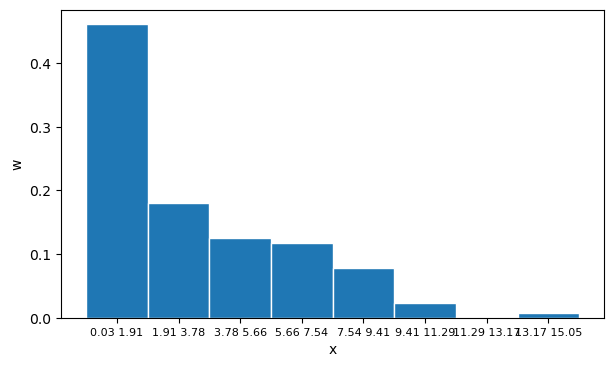

Полученное значение критерия Пирсона 78.16, критическое значение 11.07
Выборка НЕ принадлежит нормальному распределению

Количество интервалов =  6


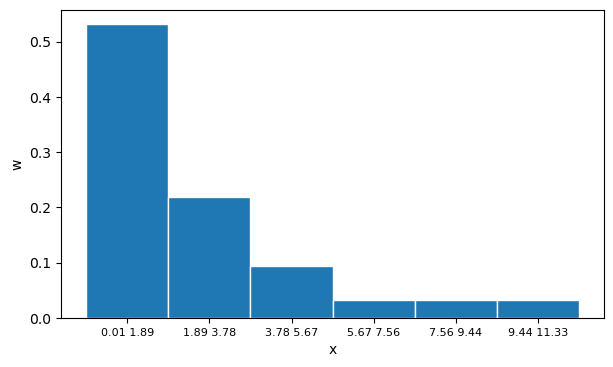

Полученное значение критерия Пирсона 20.62, критическое значение 7.81
Выборка НЕ принадлежит нормальному распределению


In [127]:
stat_n_128 = get_stat(data_normal_128)
plot_histogram(stat_n_128)
pirs_norm(stat_n_128, data_normal_128)
print()

stat_n_32 = get_stat(data_normal_32)    
plot_histogram(stat_n_32)
pirs_norm(stat_n_32, data_normal_32)
print()

stat_e_128 = get_stat(data_exp_128)
plot_histogram(stat_e_128)
pirs_norm(stat_e_128, data_exp_128)
print()

stat_e_32 = get_stat(data_exp_32)
plot_histogram(stat_e_32)
pirs_norm(stat_e_32, data_exp_32)

### Проверка гипотезы о показательном распределении

In [128]:
#показательное распределение
def pirs_exp(stat, data):
    mean = data.mean()
    lamb = 1/mean
    
    #получение теоретических частот нормального распределения
    stat['Pi'] = np.exp(-lamb*stat[0])-np.exp(-lamb*stat[1])
    stat['nP'] = stat['Pi'] * len(data)
    Xi2 = sum((stat['ni']-stat['nP'])**2/stat['nP']) #полученное значение критерия Пирсона
    #Критическое значение берем из таблицы
    k = len(stat) - 1 - 1 #число степеней свободы = кол-во интервалов - кол-во параметров распр - 1
    Xi2teor = scipy.stats.chi2.ppf(0.95, k)
    print(f'Полученное значение критерия Пирсона {round(Xi2,2)}, критическое значение {round(Xi2teor,2)}')
    if Xi2 < Xi2teor:
        print('Выборка принадлежит показательному распределению')
    else:
        print('Выборка НЕ принадлежит показательному распределению\n')

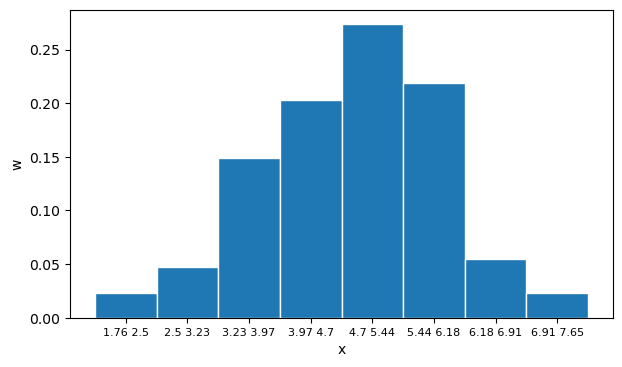

Полученное значение критерия Пирсона 260.16, критическое значение 12.59
Выборка НЕ принадлежит показательному распределению




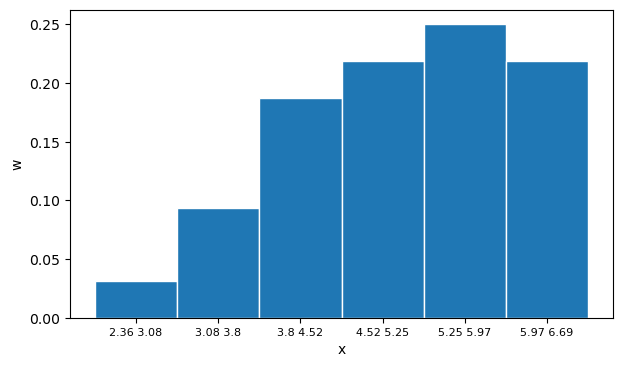

Полученное значение критерия Пирсона 77.86, критическое значение 9.49
Выборка НЕ принадлежит показательному распределению




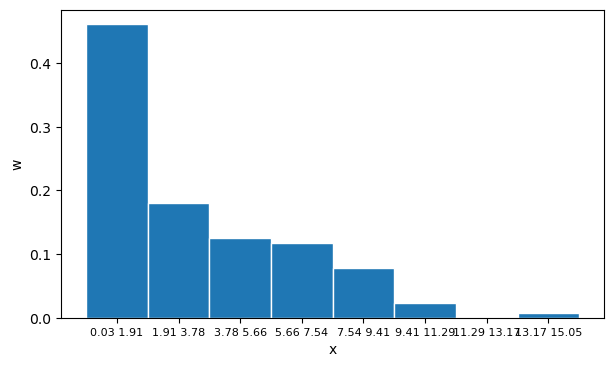

Полученное значение критерия Пирсона 10.28, критическое значение 12.59
Выборка принадлежит показательному распределению



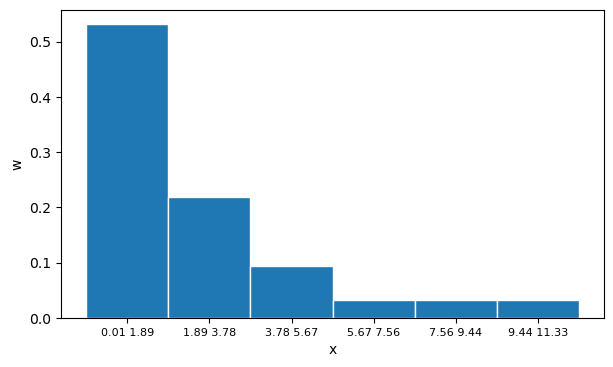

Полученное значение критерия Пирсона 1.45, критическое значение 9.49
Выборка принадлежит показательному распределению


In [129]:
plot_histogram(stat_n_128)
pirs_exp(stat_n_128, data_normal_128)
print()
   
plot_histogram(stat_n_32)
pirs_exp(stat_n_32, data_normal_32)
print()

plot_histogram(stat_e_128)
pirs_exp(stat_e_128, data_exp_128)
print()

plot_histogram(stat_e_32)
pirs_exp(stat_e_32, data_exp_32)

## Метод анаморфоз

**Анаморфоза** – нелинейное преобразование, которое приводит данные в линейную зависимость, если модель процесса соответствует преобразованию.

Путем перебора анаморфоз, соответствующих различным вероятностным распределениям, можно выбрать то распределение, которое линеаризует исходные данные.

Анаморфоза, которая спрямляет данные на большем интервале, чем другие, будет иметь наивысший ранг значимости.
Построение анаморфоз основано, в частности, на следующих преобразованиях координат: логарифмирование, сдвиг и растяжение аргумента, инверсия функции или аргумента.

### Анаморфоза для нормального распределения
Анаморфоза нормального распределения может быть получена из уравнения для плотности нормального распределения путем логарифмирования правой и левой частей.

$$f(x) = \frac{1}{\sigma\sqrt{2\pi}}\cdot e ^{\frac{-(x-\mu)^2}{2\sigma^2}}$$

Взяв натуральный логарифм, получим

$$ln(f(x)) = ln(\frac{1}{\sigma\sqrt{2\pi}})-{\frac{(x-\mu)^2}{2\sigma^2}}$$

Получаем зависимость вида $y = kx + b$, где 

$$ y = ln(f(x)) $$

$$ k = -{\frac{1}{2\sigma^2}} $$

$$ x = (x-\mu)^2 $$

$$ b = -ln(\sigma\sqrt{2\pi}) $$


Построение данных, соответствующих нормальному распределению, получает спрямление в координатах

$$ ln(f(x)) \sim (x-\mu)^2$$


Математическое ожидание $\mu$ заменяем на точечную оценку $\overline{x_в}$. За оценку плотности $f(x)$ берем относительные частоты $w$.

Далее можно оценить качество спрялмения данных с помощью линейной регрессии.

По построенным прямым можно найти параметры распределения с помощью угла наклона построенной прямой:

$$ k = -\frac{1}{2\cdot\sigma^2} => \sigma = \sqrt{-\frac{1}{2k}} $$

### Анаморфоза показательного распределения

Уравнение плотности распределения:

$$ f(x) = \lambda e ^{-\lambda x}, x \ge 0$$

Прологарифмировав, получим: 

$$ ln(f(x)) = ln(\lambda) -\lambda x\ge 0$$

Построение данных, соответствующих показательному распределению, получает спрямление в координатах

$$ ln(f(x)) \sim x$$

Параметр распределения :

$$ \lambda = -k$$

In [182]:
def anam(stat, data):
    stat = stat.drop(stat['ni'][stat['ni'] == 0].index,axis='index') #удаление интервалов с 0
    mean = data.mean()
    m_ster = int(1 + np.log2(len(data)))
    len_iter=(data.max() - data.min())/m_ster #длина каждого частичного интервала
    stat['x'] = stat[0] + len_iter/2 #середины интервалов
    
    
    x_norm = (stat['x']-mean)**2
    y_norm  = np.log(stat['wi'])
    
    x_exp = stat['x']
    y_exp = np.log(stat['wi'])
    
    model_norm = LinearRegression()
    model_norm.fit(x_norm.values.reshape((-1,1)),y_norm.values)
    k_norm=model_norm.coef_[0]
    
    model_exp = LinearRegression()
    model_exp.fit(x_exp.values.reshape((-1,1)),y_exp.values)
    k_exp=model_exp.coef_[0]
    
    fig, ax = plt.subplots(1,3, figsize = (13,4))
    fig.tight_layout(pad = 2)
    ax[0].bar(stat['int'],stat['wi'], width=1.0, edgecolor = 'white')
    ax[0].tick_params('x', rotation = 60)
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('w')
    ax[0].set_title('Гистограмма')
    
    ax[1].set_xlabel("(x-mean)^2")
    ax[1].set_ylabel("ln(w)")
    ax[1].scatter(x_norm,y_norm, s=100)
    ax[1].plot(x_norm,model_norm.predict(x_norm.values.reshape((-1,1))), color = 'green', 
               label = 'R2: '+ str(round(model_norm.score(x_norm.values.reshape((-1,1)),y_norm.values), 2)))
    ax[1].legend()
    ax[1].set_title('Нормальное распределение')
    
    ax[2].set_xlabel("x")
    ax[2].set_ylabel("ln(w)")
    ax[2].scatter(x_exp,y_exp, s=100)
    ax[2].plot(x_exp,model_exp.predict(x_exp.values.reshape((-1,1))), color = 'green', 
               label = 'R2: '+ str(round(model_exp.score(x_exp.values.reshape((-1,1)),y_exp.values), 2)))
    ax[2].legend()
    ax[2].set_title('Показательное распределение')
    
    plt.show()

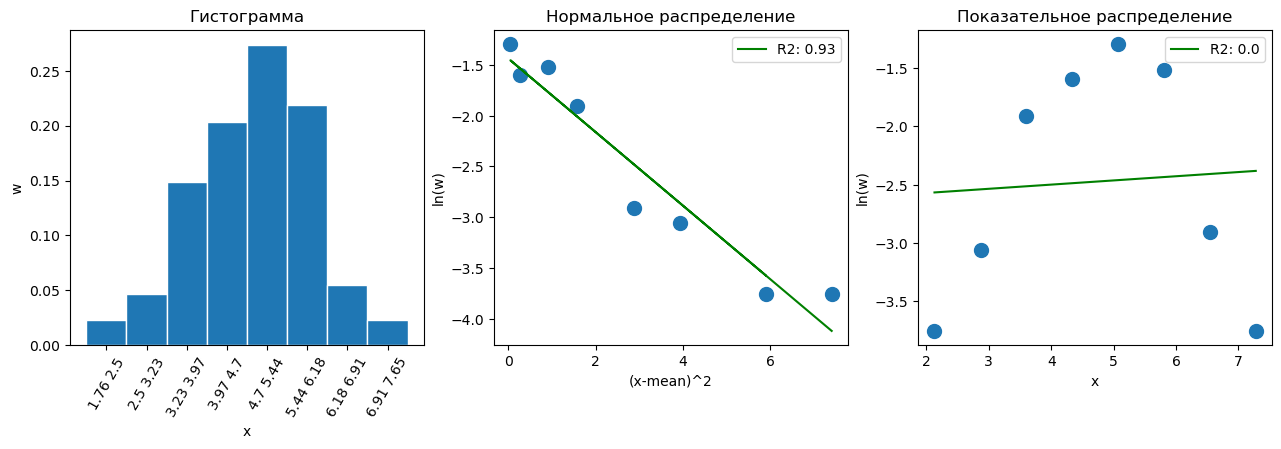

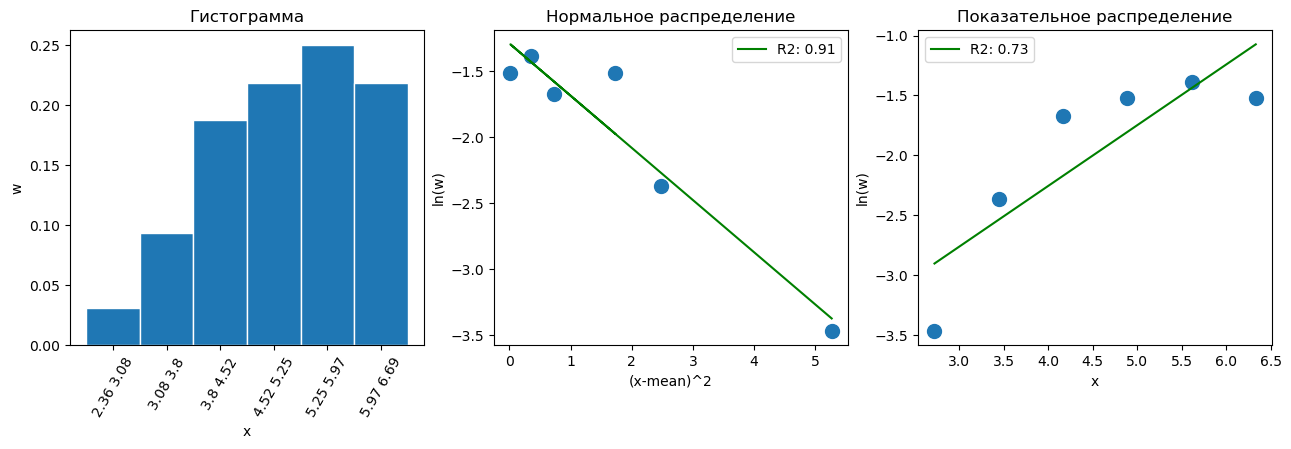

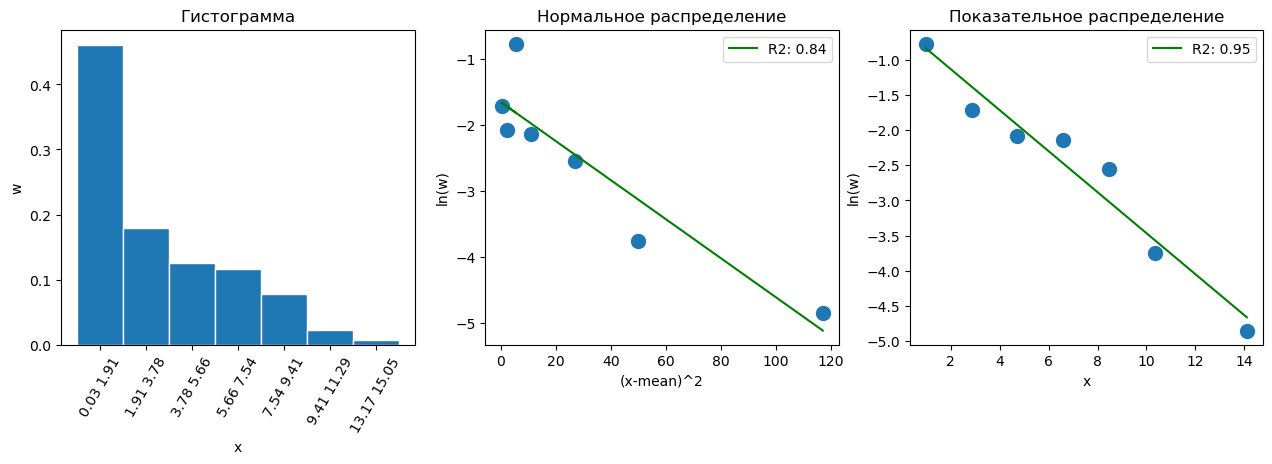

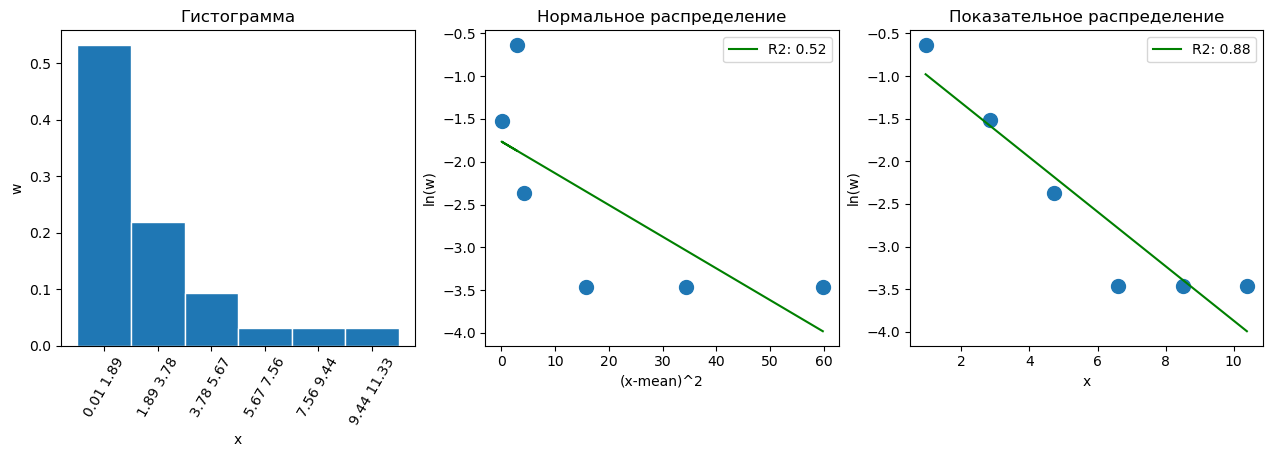

In [183]:
anam(stat_n_128, data_normal_128)
anam(stat_n_32, data_normal_32)

anam(stat_e_128, data_exp_128)
anam(stat_e_32, data_exp_32)

Наилучшее спрямление достигается c помощью анаморфоз, которые соотвествуют модели процесса.

Аналогичные преобразования можно построить для распределений: логнормальное, логистическое, Пуассона, Пирсона, Ципфа, Гамма, Гомперца (Гумбеля), Вейбулла.